<h1 align = 'center'> <font color = "#EE3BA">Linear Regression From Sctrach </h1>

<h2 align = center> <font color = '#FF1234'>What is linear regression ?</font></h2>

<h3 align = center> <font color = '#76BBAA'>Linear regression is a statistical approach used to model the relationship between a dependent variable (y) and one or more independent variables (x). It assumes a linear relationship between the variables, meaning that the change in the dependent variable is directly proportional to the change in the independent variable.</h3>

<h2 align = left><font color = #3FF2A > Formula </h2>

$\huge y = \beta_1 x + \beta_0 $

Where:

- \( y \) is the dependent variable

- \( m \) is the slope of the line, representing the rate of change in \( y \) for a one-unit increase in \( x \)

- \( b \) is the y-intercept, representing the value of \( y \) when \( x \) is zero.



<h2 align = center><font color = "#679823"> Main Goal </h2>

<h3 align = center> <font color = '#76BBFF'>

Linear regression aims to find the best-fitting line that can explain the relationship between the independent variables and the dependent variable. The goal is to minimize the sum of the squared differences between the observed and predicted values of the dependent variable. This process helps to establish a relationship between the variables and predict the value of the dependent variable for new, unseen data.</h3>

</h3>

<h2 align = center><font color = "#6711FF"> How To Find The Coefficients ?</h2>


<h3 align = center> <font color = '#76BBFF'>

We can find these using different approaches. One is the Ordinary Least Mean Square Method approach and the Gradient Descent approach.

</font></h3>


<h2><font color = "FF00FF">The Ordinary Least Mean Square:</font></h2>
 (OLS) method involves minimizing the sum of squared errors between the observed and predicted values of the dependent variable. The method finds the values of m  and b  that minimize this sum.

<h2><font color = "FF00AA">The Gradient Descent:</h2></font>
This approach uses an iterative approach to find the values of m and b that minimize the sum of squared errors. It starts with an initial guess for m and b, and then iteratively updates these values using the gradient of the sum of squared errors with respect to m and b to move closer to the minimum.


<h1 align = center> <font color = '#FFFFFF'> Ordinary Least Mean Square </h1>



<h2 align = center> <font color = 'orange'>Error</font></h2>

<center>

$ \sum_{i=1}^n r_i^2 $

</center>

Where:

- \( ri \) is the difference between the observed value \( yi \) and the predicted value \( y'i \)

- \( n \) is the number of observations.

<h2 align = center> <font color = 'AA55EE'>To Find &beta;1 and &beta;2 </font></h2>

<p align="center">
  <img src="image.jpg" alt="Local Image" width="300" height="200"/>
</p>


Where: 

- \( X \) is the independent variable

- \( Y \) is the dependent variable

- \( n \) is the number of observations

<h1 align = center> <font color = "CC4400">Implementation </h1>

<h2 align = center><font color = "blurple">Importing Libraries</h2></font>

In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h2 align = center><font color = "olive">Importing Dataset</h2></font>

In [326]:
data = pd.read_csv('dataset.csv')

<h2 align = center><font color = "yellow">Exploring Data</h2></font>

In [327]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


<h3> Let's find relationship between Head Size  and Brain weights


In [502]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

Xmean = np.mean(X)
YMean = np.mean(Y)

# Total Rows in Dataset
noOfRows = len(data)

# Calculating B1
numerator = 0
denominator = 0

for i in range (noOfRows):
    numerator += (X[i] - Xmean)*(Y[i]-YMean)
    denominator += (X[i] - Xmean)**2

b1 = numerator/denominator

print(f'm = {b1}')


# Calculating B0

b0 = YMean - (b1*Xmean)

print(f'b = {b0}')



m = 0.26342933948939945
b = 325.57342104944223


Since , we already found the coefficients. So we can write the equation like this:

Salary = 325.57 + (0.263229 * Head Size)

<h2 align = center><font color = "Pink">Plotting</h2></font>

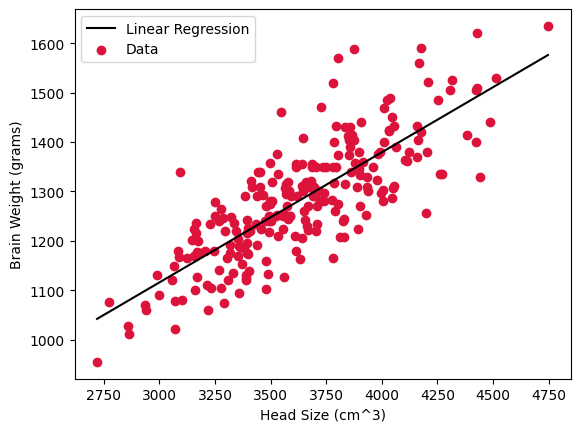

In [329]:
# Plotting line
x = np.linspace(np.min(X),np.max(X),1000)
plt.plot(x, b0 + b1 * x,color = "black" , label = "Linear Regression")

#plot the data point
plt.scatter(X, Y, color='crimson', label='Data')
# x-axis label
plt.xlabel("Head Size (cm^3)")
#y-axis label
plt.ylabel('Brain Weight (grams)')
plt.legend()
plt.show()

<h2 align = center><font color = "#1589FF">Model Evaluation Using RMSE</h2></font>

## Formula :

$ RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2} $

Where:

- \( yi \) is the actual value of the dependent variable for the \( i \)th observation

### Implementation

In [330]:
rmse = 0

for i in range(len(data)):
    yPredicted = b0 + b1*X[i]
    rmse +=  (Y[i] - yPredicted) ** 2

rmse = np.sqrt(rmse/len(data))

print(f'Root Mean Squared Error (RMSE) = {rmse}')



Root Mean Squared Error (RMSE) = 72.1206213783709


### Interpretation

The Root Mean Squared Error (RMSE) is a measure of the average magnitude of the error in a set of predictions. A lower RMSE indicates better predictions. In this case, the RMSE is approximately 3152.52. This means that, on average, the predicted salaries are 3152.52 away from the actual salaries.




<h2 align = center><font color = "#158900">Finding R^2</h2></font>

### Formula:

$ R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2} $

Where:

- \( yi \) is the actual value of the dependent variable for the \( i \)th observation

### Implementation

In [331]:

rSquareNum  = 0
rSquareDen = 0 

for i in range(len(data)):
    yPredicted = b0 +b1 * X[i]

    rSquareNum +=  (Y[i] - yPredicted) ** 2
    rSquareDen +=  (Y[i] - YMean) ** 2

score = rSquareNum / rSquareDen

print(f'R-squared (R^2) = {1-score}')





R-squared (R^2) = 0.6393117199570003


### Interpretation

An R-Squared value of 0.9569 indicates that approximately 95.69% of the variance in the dependent variable is explained by the model.

This means that the model explains the salaries of the employees well, considering the independent variables provided. The model is a good fit for the data.

### Testing 


In [332]:
# Predicting the values from data

randomRows = np.random.randint(0,31,10)

for i in range(len(randomRows)):
    print(f"\n{randomRows[i]}\n")
    print(f"Real Value Of Y:{Y[i]}") 
    print(f"Predicted Value of Y : {b0 + b1 * X[i]}")
    print(f"Error = {Y[i] - (b0 + b1 * X[i] )}")



25

Real Value Of Y:1530
Predicted Value of Y : 1514.1666008256125
Error = 15.833399174387523

14

Real Value Of Y:1297
Predicted Value of Y : 1310.2722920608173
Error = -13.272292060817335

29

Real Value Of Y:1335
Predicted Value of Y : 1448.0458366137732
Error = -113.04583661377319

14

Real Value Of Y:1282
Predicted Value of Y : 1320.546036300904
Error = -38.54603630090401

18

Real Value Of Y:1590
Predicted Value of Y : 1425.9177720966638
Error = 164.08222790333616

24

Real Value Of Y:1300
Predicted Value of Y : 1269.9676031189392
Error = 30.032396881060777

19

Real Value Of Y:1400
Predicted Value of Y : 1322.6534710168191
Error = 77.34652898318086

8

Real Value Of Y:1255
Predicted Value of Y : 1263.118440292215
Error = -8.118440292214927

12

Real Value Of Y:1355
Predicted Value of Y : 1277.3436246246424
Error = 77.65637537535758

28

Real Value Of Y:1375
Predicted Value of Y : 1374.549050896231
Error = 0.4509491037690623


<h1 align = center> <font color = '#FFFFFF'> Gradient Decent </h1>


Video Link : https://www.youtube.com/watch?v=ORyfPJypKuU

#### What is Gradient Decent ?

Gradient descent is an optimization algorithm used to find the minimum of a function. It works by iteratively adjusting the coefficients (m and b) of a model to minimize the cost function (sum of squared errors in the case of linear regression).

#### What are defination of Hyperparameter ?


Hyperparameters are parameters that are not directly learned within the model training process but are set beforehand. They can significantly impact the model's performance, including the convergence speed, the quality of the predictions, and the ability to generalize to unseen data.

#### How do we choose Hyperparameters?

Choosing hyperparameters requires a careful and systematic approach. Here are some strategies:

- Grid Search: This method involves systematically testing different combinations of hyperparameters and selecting the combination that produces the best performance.

- Random Search: This method also involves testing different combinations of hyperparameters, but it randomly selects combinations instead of systematically testing them.

- Cross-Validation: This method involves dividing the dataset into k subsets, training the model on k-1 subsets, and evaluating its performance on the remaining subset. The performance is then averaged over the k iterations.




#### What are Some Hyperparameters in Gradient Decent ?


- Learning Rate (alpha): This is a small positive value that determines the size of the steps taken in the direction of the gradient. A smaller learning rate may require more iterations to converge, but it may also lead to higher training time.


- Number of Iterations: This is the maximum number of times the algorithm will update the coefficients. If the algorithm doesn't converge within the specified number of iterations, it may be necessary to increase the learning rate or decrease the number of iterations.

- Batch Size: This is the number of training examples used to calculate the gradient in each iteration. A smaller batch size may result in faster convergence, but it may also lead to higher variance in the model's predictions.


#### Steps of Gradient Descent

- Choose an initial set of coefficients (m and b).

- Set epochs and learning rate

- Calculate the gradient of the cost function with respect to m and b.

- Update the coefficients by subtracting the product of the learning rate and the gradient from the current coefficients.



### Formula:

$ \text{Cost Function} =\sum_{i=1}^n (y_i - (m \cdot x_i + b))^2 $

$ \frac{\partial \text{Cost Function}}{\partial m} = -2 \sum_{i=1}^n x_i(y_i - (m \cdot x_i - b)) $

$ \frac{\partial \text{Cost Function}}{\partial b} = -2 \sum_{i=1}^n (y_i - (m \cdot x_i - b)) $

### Implementation

In [506]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# Generate a random regression problem.
X,y = make_regression(n_samples=1000, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=15)

# Split the data into training and test sets.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


model = LinearRegression()
model.fit(X_train,y_train)

print(f"m = {model.coef_[0]}")
print(f"b = {model.intercept_}")

y_pred = model.predict(X_test)
print(f"R^2 = {r2_score(y_test,y_pred)}")


m = 31.733880954434117
b = -0.8482093565589488
R^2 = 0.7500507456384217


## Gradient Descent

In [499]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 0
        self.b = 0
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b
    

In [500]:
gd = GDRegressor(0.001,1000)
gd.fit(X_train,y_train)


31.7338809544341 -0.8482093565589482


In [501]:
y_pred = gd.predict(X_test)
print(f"R^2 Value Using Gradient Descent = {r2_score(y_test,y_pred)}")

R^2 Value Using Gradient Descent = 0.7500507456384217


### Interpretation


Gradient Descent is a powerful optimization algorithm for finding the minimum of a cost function. In this case, we used it to train a linear regression model on a randomly generated regression problem. The trained model's coefficients (m and b) are approximately [31.733, -0.84].

The R-squared value using Gradient Descent is approximately 0.7500, which indicates that the model explains the variance in the test data well.